# SMS Spam Classification Project

**SETPS :**
 - Import the Dataset
 - Data Cleaning
 - Exploratory Data Analysis(EDA)
 - Text Preprocessing
 - Model Building
 - Model Evaluation
 - Improvement
 - Export the Model as Pickle file 

**1) IMPORT THE DATASET**


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
df=pd.read_csv("spam.csv")

In [81]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [82]:
df.shape

(5572, 5)

**2) DATA CLEANING**

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [84]:
#delete unnecessary last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [85]:
df.shape

(5572, 2)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [87]:
df.sample(5)

,v1,v2
4237,ham,Lol wtf random. Btw is that your lunch break
1934,ham,Hope you are having a great day.
2179,ham,And popping &lt;#&gt; ibuprofens was no help.
5415,ham,You should get more chicken broth if you want ...
1343,ham,Crazy ar he's married. ﾌﾏ like gd looking guys...


In [88]:
#rename the columns names for better understanding
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [89]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [90]:
#encode target values ham & spam with 0 & 1 respectively
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [91]:
df['target'] = encoder.fit_transform(df['target'])

In [92]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [93]:
#handle missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [94]:
#handle duplicate values
df.duplicated().sum()

403

In [95]:
df = df.drop_duplicates(keep='first')

In [96]:
df.duplicated().sum()

0

In [97]:
df.shape

(5169, 2)

**3) EXPLORATORY DATA ANALYSIS(EDA)**

In [98]:
#check no of ham and spam messages in the data
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

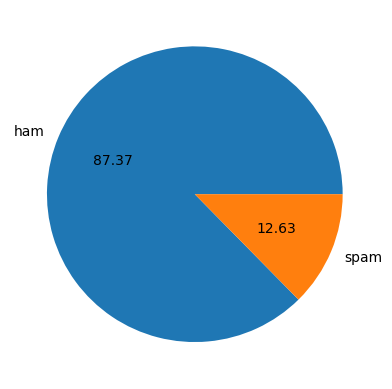

In [99]:
#plot a pie chart of ham and spam messages 
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [100]:
import nltk

In [101]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Nageswara
[nltk_data]     Reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [102]:
#create 3 new columns for maintaining characters,words,sentences counts of the text b

In [103]:
#count no of characters
df['character_count'] = df['text'].apply(len)

In [104]:
#count no of words
df['word_count'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [105]:
#count of sentences
df['sentence_count'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [106]:
df.sample(5)

,target,text,character_count,word_count,sentence_count
3689,0,What happen dear tell me,24,5,1
225,0,Would really appreciate if you call me. Just n...,69,15,2
1169,0,Msgs r not time pass.They silently say that I ...,146,33,2
109,0,Dont worry. I guess he's busy.,30,9,2
4751,0,Well boy am I glad G wasted all night at apple...,62,13,1


In [107]:
#describe for entire dataset
df[['character_count','word_count','sentence_count']].describe()

,character_count,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.894177,18.456568,1.966531
std,58.162207,13.325487,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [108]:
#describe for only ham messages
df[df['target']==0][['character_count','word_count','sentence_count']].describe()

,character_count,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.424048,17.123561,1.820195
std,56.337668,13.493783,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [109]:
#describe for only spam messages
df[df['target']==1][['character_count','word_count','sentence_count']].describe()

,character_count,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.471669,27.675345,2.978560
std,30.019848,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [110]:
#histogram plot for spam and ham messages
import seaborn as sns

<Axes: xlabel='character_count', ylabel='Count'>

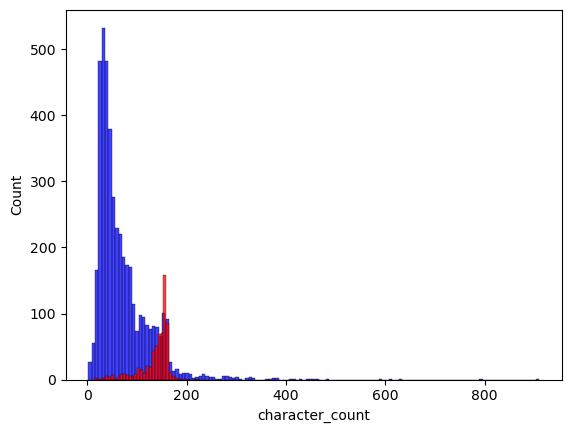

In [111]:
sns.histplot(df[df['target']==0]['character_count'],color='blue')
sns.histplot(df[df['target']==1]['character_count'],color='red')

<Axes: xlabel='word_count', ylabel='Count'>

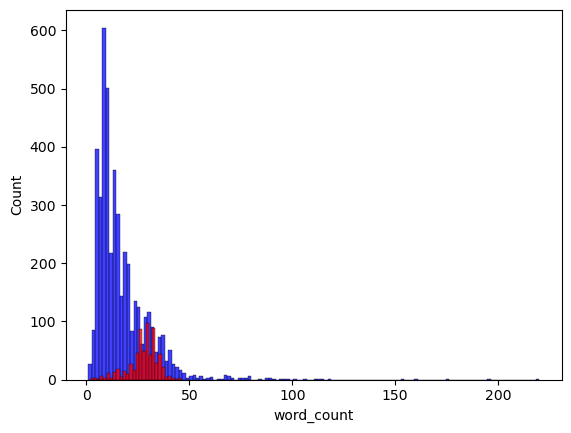

In [112]:
sns.histplot(df[df['target']==0]['word_count'],color='blue')
sns.histplot(df[df['target']==1]['word_count'],color='red')

In [113]:
#conclusion : Spam msgs have more characters,words than Ham msgs

In [114]:
df[['target','character_count','word_count','sentence_count']].corr()

,target,character_count,word_count,sentence_count
target,1.000000,0.383011,0.263095,0.265459
character_count,0.383011,1.000000,0.966096,0.624294
word_count,0.263095,0.966096,1.000000,0.680038
sentence_count,0.265459,0.624294,0.680038,1.000000


<Axes: >

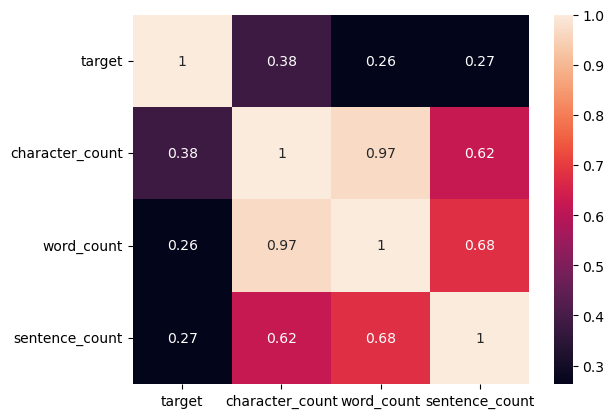

In [115]:
sns.heatmap(df[['target','character_count','word_count','sentence_count']].corr(),annot=True)

**4) TEXT PREPROCESSING**

 - Convert to Lower Case
 - Tokenization
 - Remove Special Characters
 - Remove Stop Words and Punctuation
 - Stemming

In [116]:
#stop words - these are the words which have no meaning, just used for sentence formation
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Nageswara
[nltk_data]     Reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [117]:
def transform_text(text):
    
    text = text.lower()
    
    text = nltk.word_tokenize(text)
    
    temp=[]
    for word in text:
        if word.isalnum():
            temp.append(word)
            
    text=temp[:]
    temp.clear()
    
    for word in text:
         if word not in stopwords.words('english') and word not in string.punctuation:
                    temp.append(word)
                    
    text=temp[:]
    temp.clear()
    
    porter=PorterStemmer()
    for word in text:
        temp.append(porter.stem(word))
    
    return " ".join(temp)

In [118]:
transform_text("Hi!! This is ML project.. based on span detection &&&")

'hi ml project base span detect'

In [119]:
df['transformed_text'] = df['text'].apply(transform_text)

In [120]:
df.head()

,target,text,character_count,word_count,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [121]:
#pip install wordcloud

In [122]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [123]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

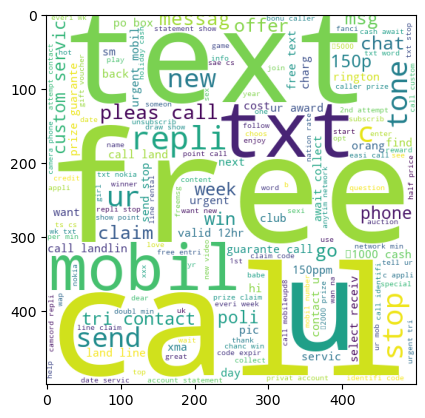

In [124]:
plt.imshow(spam_wc)

In [125]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

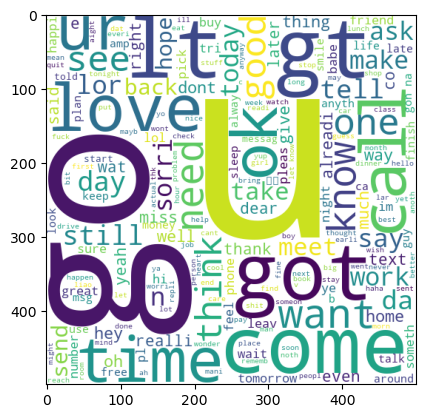

In [126]:
plt.imshow(ham_wc)

In [127]:
#to get 30 most common words in both ham and spam messages

In [128]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [129]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [130]:
print(len(spam_corpus))
print(len(ham_corpus))

10133
35421


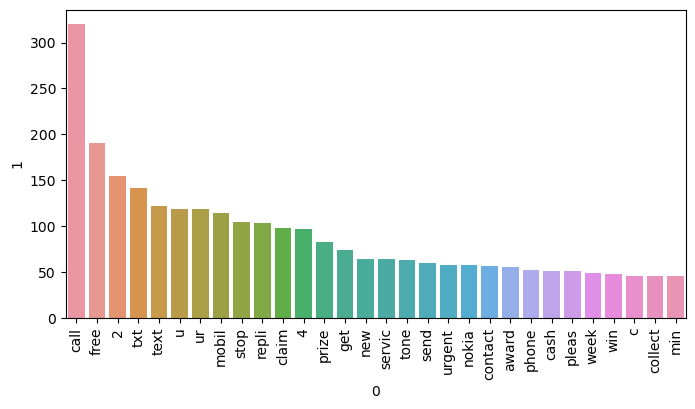

In [131]:
from collections import Counter
plt.figure(figsize=(8,4))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
            y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

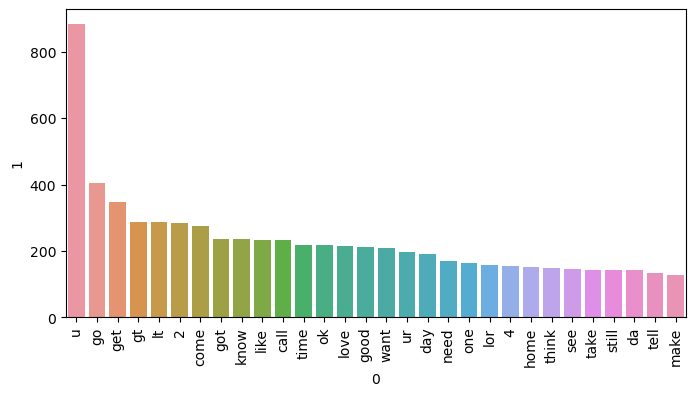

In [132]:
plt.figure(figsize=(8,4))
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
            y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [133]:
df.head()

,target,text,character_count,word_count,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


**5) MODEL BUILDING**

Steps: 
 - Convert text to vectors- BOW MODEL - CountVect, TFIDF
 - Model - Naive Bayes

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [365]:
tfidf = TfidfVectorizer(max_features = 400)

In [366]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [367]:
x.shape

(5169, 400)

In [368]:
y = df['target'].values

In [369]:
from sklearn.model_selection import train_test_split

In [370]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [371]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [372]:
classifier = MultinomialNB()

In [373]:
classifier.fit(x_train,y_train)

MultinomialNB()

In [374]:
y_pred = classifier.predict(x_test)

In [375]:
accuracy_score(y_test,y_pred)

0.965183752417795

In [376]:
precision_score(y_test,y_pred)

0.9396551724137931

In [377]:
print(confusion_matrix(y_test,y_pred))

[[889   7]
 [ 29 109]]


In [391]:
msg = "Get upto 30% discount contact us for a huge prize "
msg = transform_text(msg)
msg = tfidf.transform([msg])
print(classifier.predict(msg)[0])

1


**6) EXPORT THE MODEL AS PICKLE FILE**

In [379]:
import pickle

In [392]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(classifier,open('model.pkl','wb'))

In [381]:
np.__version__

'1.24.3'

In [382]:
pd.__version__

'2.0.3'

In [383]:
import sklearn
sklearn.__version__

'1.3.0'